Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None

First 5 rows:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


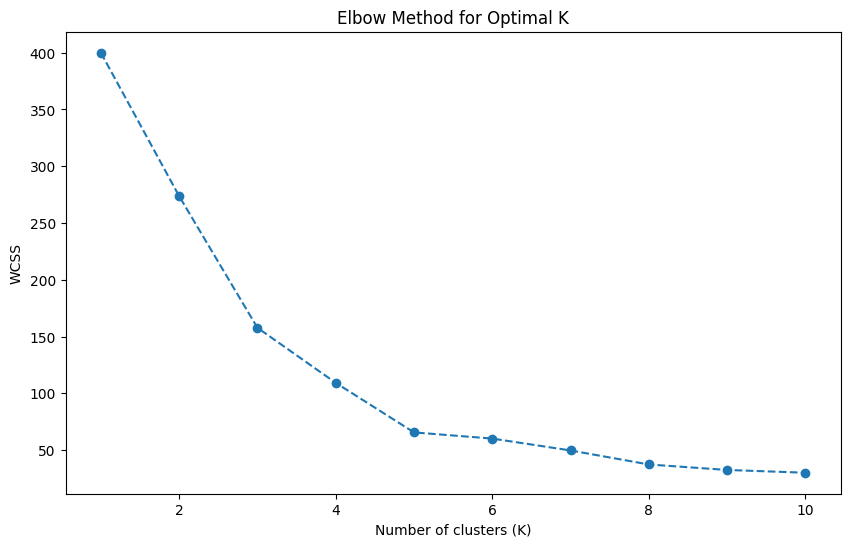

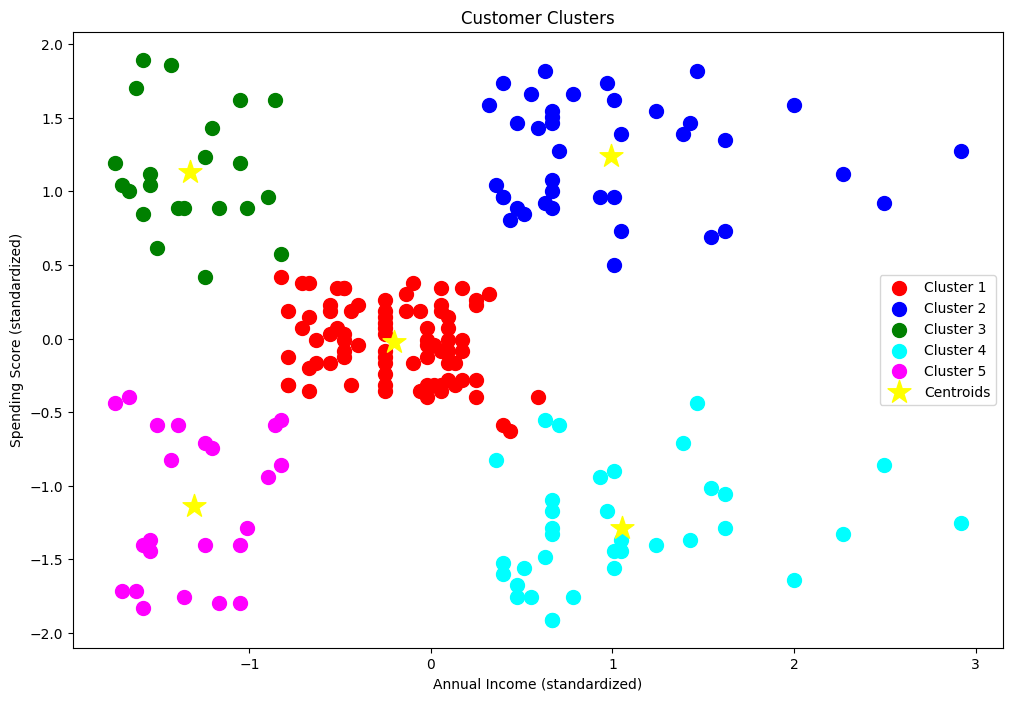


Cluster Summary:
               Age  Annual Income (k$)  Spending Score (1-100)  Count
Cluster                                                              
0        42.716049           55.296296               49.518519     81
1        32.692308           86.538462               82.128205     39
2        25.272727           25.727273               79.363636     22
3        41.114286           88.200000               17.114286     35
4        45.217391           26.304348               20.913043     23

Cluster Interpretation:
Cluster 1: High Income, Low Spending (Careful Customers)
Cluster 2: Average Income, Average Spending (Standard Customers)
Cluster 3: High Income, High Spending (Target Customers)
Cluster 4: Low Income, High Spending (Careless Customers)
Cluster 5: Low Income, Low Spending (Sensible Customers)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Load the dataset
# Dataset: https://www.kaggle.com/datasets/yichoudhary7/customer-segmentation-tutorial-in-python
df = pd.read_csv('D:\\PYTHON\\internship\\ML-infosys\\Mall_Customers.csv') 

# Display basic info about the dataset
print("Dataset Info:")
print(df.info())
print("\nFirst 5 rows:")
print(df.head())

# Select relevant features for clustering
X = df.iloc[:, [3, 4]].values

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
wcss = [] 
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

# Based on the elbow method
k = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

# Add cluster labels to the original dataframe
df['Cluster'] = y_kmeans

# Visualize the clusters
plt.figure(figsize=(12, 8))
colors = ['red', 'blue', 'green', 'cyan', 'magenta']
for i in range(k):
    plt.scatter(X_scaled[y_kmeans == i, 0], 
                X_scaled[y_kmeans == i, 1], 
                s=100, c=colors[i], 
                label=f'Cluster {i+1}')

plt.scatter(kmeans.cluster_centers_[:, 0], 
            kmeans.cluster_centers_[:, 1], 
            s=300, c='yellow', 
            label='Centroids', marker='*')

plt.title('Customer Clusters')
plt.xlabel('Annual Income (standardized)')
plt.ylabel('Spending Score (standardized)')
plt.legend()
plt.show()

# Analyze the clusters
cluster_summary = df.groupby('Cluster').agg({
    'Age': 'mean',
    'Annual Income (k$)': 'mean',
    'Spending Score (1-100)': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': 'Count'})

print("\nCluster Summary:")
print(cluster_summary)

# Interpretation of clusters
print("\nCluster Interpretation:")
print("Cluster 1: High Income, Low Spending (Careful Customers)")
print("Cluster 2: Average Income, Average Spending (Standard Customers)")
print("Cluster 3: High Income, High Spending (Target Customers)")
print("Cluster 4: Low Income, High Spending (Careless Customers)")
print("Cluster 5: Low Income, Low Spending (Sensible Customers)")